In [1]:
#Standard python imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Stats imports
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

#random seed for replicability
np.random.seed(seed=42)

In [2]:
atl_df = pd.read_csv('../data/atl_df_cleaned.csv')
bos_df = pd.read_csv('../data/bos_df_cleaned.csv')
chi_df = pd.read_csv('../data/chi_df_cleaned.csv')
den_df = pd.read_csv('../data/bos_df_cleaned.csv')

In [3]:
#Subsetting each cities accident data to those of interest for our problem statement
#Week 10 is the week before the time change
#Week 11 is the week of the time change
#Week 12 is the week after the time change
atl_df_spring_dst = atl_df[(atl_df['week'] == 10) | (atl_df['week'] == 11) | (atl_df['week'] == 12)]
bos_df_spring_dst = bos_df[(bos_df['week'] == 10) | (bos_df['week'] == 11) | (bos_df['week'] == 12)]
chi_df_spring_dst = chi_df[(chi_df['week'] == 10) | (chi_df['week'] == 11) | (chi_df['week'] == 12)]
den_df_spring_dst = den_df[(den_df['week'] == 10) | (den_df['week'] == 11) | (den_df['week'] == 12)]

In [4]:
#Double check that the spring DST dataframes were created correctly
print(atl_df_spring_dst['week'].value_counts())
print(bos_df_spring_dst['week'].value_counts())
print(chi_df_spring_dst['week'].value_counts())
print(den_df_spring_dst['week'].value_counts())

10    467
12    430
11    362
Name: week, dtype: int64
12    301
11    273
10    196
Name: week, dtype: int64
11    918
12    714
10    540
Name: week, dtype: int64
12    301
11    273
10    196
Name: week, dtype: int64


In [5]:
#Subsetting each cities accident data to those of interest for our problem statement
#Week 44 is the week before the time change
#Week 45 is the week of the time change
#Week 46 is the week after the time change
atl_df_fall_dst = atl_df[(atl_df['week'] == 44) | (atl_df['week'] == 45) | (atl_df['week'] == 46)]
bos_df_fall_dst = bos_df[(bos_df['week'] == 44) | (bos_df['week'] == 45) | (bos_df['week'] == 46)]
chi_df_fall_dst = chi_df[(chi_df['week'] == 44) | (chi_df['week'] == 45) | (chi_df['week'] == 46)]
den_df_fall_dst = den_df[(den_df['week'] == 44) | (den_df['week'] == 45) | (den_df['week'] == 46)]

In [6]:
#Double check that the spring DST dataframes were created correctly
print(atl_df_fall_dst['week'].value_counts())
print(bos_df_fall_dst['week'].value_counts())
print(chi_df_fall_dst['week'].value_counts())
print(den_df_fall_dst['week'].value_counts())

44    671
45    642
46    635
Name: week, dtype: int64
45    261
46    233
44    205
Name: week, dtype: int64
45    889
44    859
46    721
Name: week, dtype: int64
45    261
46    233
44    205
Name: week, dtype: int64


In [7]:
spr_dst_comb_df = pd.concat([atl_df_spring_dst, bos_df_spring_dst, chi_df_spring_dst, den_df_spring_dst])
spr_dst_comb_df['week'].value_counts()

11    1826
12    1746
10    1399
Name: week, dtype: int64

In [8]:
fall_dst_comb_df = pd.concat([atl_df_fall_dst, bos_df_fall_dst, chi_df_fall_dst, den_df_fall_dst])
fall_dst_comb_df['week'].value_counts()

45    2053
44    1940
46    1822
Name: week, dtype: int64

## ANOVA on severity of accidents for Spring DST Time Change

In [4]:
#I (CH) referenced this article for a refresher on ANOVA and to find the libraries to use for each test
#https://www.pythonfordatascience.org/anova-python/#anova-test
#I referenced these pages for a refresher on ANOVA vs. Kruskall-Wallace and the impact of a non-normal distribution
# https://stats.stackexchange.com/questions/76059/difference-between-anova-and-kruskal-wallis-test
# http://www.biostathandbook.com/kruskalwallis.html

In [19]:
#Overall comparison of week before, week of DST, and week after DST for traffic accidents in chicago
stats.f_oneway(spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 10],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 11],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 12])

F_onewayResult(statistic=7.9157344051453835, pvalue=0.00036957803620512523)

In [20]:
comb_spr_anova = ols("severity ~C(week)", data=spr_dst_comb_df).fit()
comb_aov_table = sm.stats.anova_lm(comb_spr_anova, typ=2)
comb_aov_table

,sum_sq,df,F,PR(>F)
C(week),7.780420,2.0,7.915734,0.00037
Residual,2441.537625,4968.0,NaN,NaN


In [21]:
stats.kruskal(spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 10],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 11],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 12])

KruskalResult(statistic=8.567155479080224, pvalue=0.013793225135992192)

In [22]:
#Shapiro test of normality, failed as the severity of accidents is not normally distributed
stats.shapiro(comb_spr_anova.resid)

ShapiroResult(statistic=0.8242663145065308, pvalue=0.0)

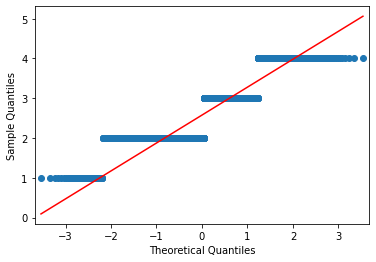

In [23]:
#QQ plot to conform lack of normality
sm.qqplot(spr_dst_comb_df['severity'], line='s');

In [24]:
#Levene's test of 
stats.levene(spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 10],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 11],
              spr_dst_comb_df['severity'][spr_dst_comb_df['week'] == 12])

LeveneResult(statistic=2.1533940455338954, pvalue=0.11619782067192008)

### Tukey Honestly Significant Difference (HSD) Test

In [25]:
spr_dst_comb_df['week'] = spr_dst_comb_df.week.map({10 : 'Week Before', 11 : 'Week of DST', 12: 'Week After'})
spr_dst_comb_df['week'].value_counts()

Week of DST    1826
Week After     1746
Week Before    1399
Name: week, dtype: int64

In [26]:
comp = mc.MultiComparison(spr_dst_comb_df['severity'], spr_dst_comb_df['week'], 
                         group_order=['Week Before', 'Week of DST', 'Week After'])
post_hoc = comp.tukeyhsd()
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Week Before,Week of DST,-0.0304,0.4426,-0.0888,0.028,False
Week Before,Week After,-0.0961,0.001,-0.1551,-0.0371,True
Week of DST,Week After,-0.0657,0.0142,-0.1207,-0.0107,True


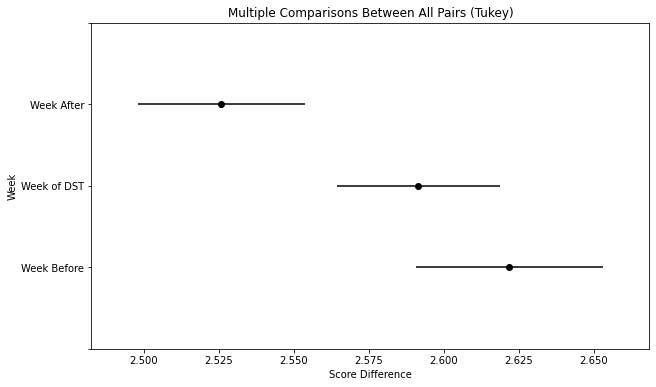

In [27]:
post_hoc.plot_simultaneous(ylabel='Week', xlabel='Score Difference');

### Bonferroni Correction

In [28]:
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonf')
tbl

group1,group2,stat,pval,pval_corr,reject
Week Before,Week of DST,1.2044,0.2285,0.6856,False
Week Before,Week After,3.7962,0.0001,0.0004,True
Week of DST,Week After,2.8516,0.0044,0.0131,True


### Sidak Correction 

In [29]:
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method='sidak')
tbl

group1,group2,stat,pval,pval_corr,reject
Week Before,Week of DST,1.2044,0.2285,0.5408,False
Week Before,Week After,3.7962,0.0001,0.0004,True
Week of DST,Week After,2.8516,0.0044,0.0131,True


''

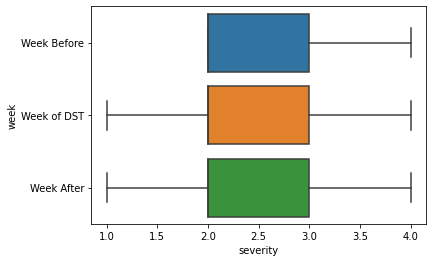

In [46]:
sns.boxplot(x=spr_dst_comb_df['severity'], y=spr_dst_comb_df['week'])
;

### Interpretation

* Based on the results of the ANOVA and Kruskall-Wallace tests we can see that there is a significant difference in the severity of traffic accidents before, during the week of DST, and after the week of DST.
* Interestingly in Atlanta we saw a difference in the week before DST and the week after DST and the week of DST and the week after DST. 